In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

In [14]:

df = yf.download('AAPL', 
                      start='2013-01-01', 
                      end='2023-01-01', 
                      progress=False,)

In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

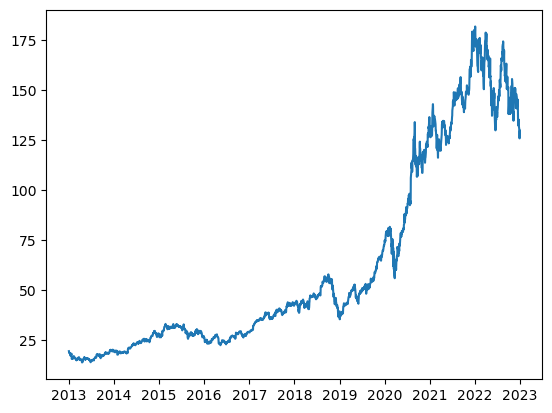

In [16]:
plt.plot(df.Close)

In [17]:
ma100=df.Close.rolling(100).mean()
ma100

Date
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
                 ...    
2022-12-23    150.515600
2022-12-27    150.157800
2022-12-28    149.764699
2022-12-29    149.412100
2022-12-30    149.062199
Name: Close, Length: 2518, dtype: float64

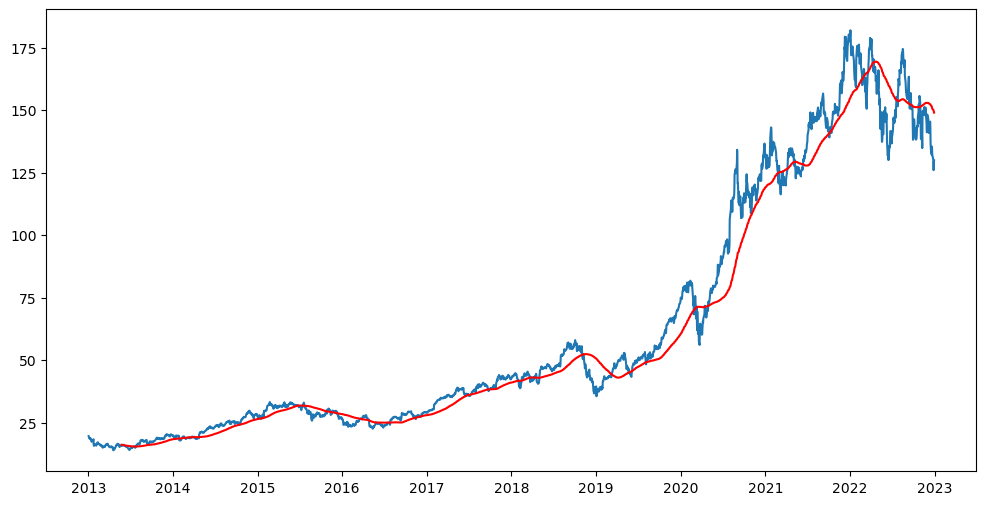

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

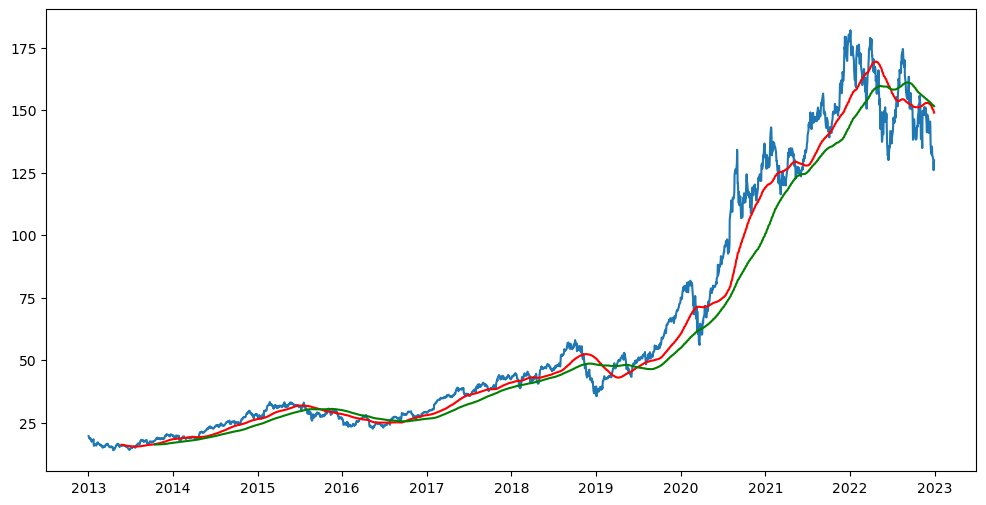

In [19]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [20]:
df.shape

(2518, 6)

Splitting into Training and Testing


In [21]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [22]:
data_testing.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scaler.fit_transform(data_training)

In [25]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [26]:
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape  [1],1)))#introduces non linearity to the model 
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))#to connect all the layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 23s 316ms/step - loss: 0.0359
Epoch 2/50
52/52 [==============================] - 16s 315ms/step - loss: 0.0075
Epoch 3/50
52/52 [==============================] - 16s 306ms/step - loss: 0.0065
Epoch 4/50
52/52 [==============================] - 27s 526ms/step - loss: 0.0063
Epoch 5/50
52/52 [==============================] - 28s 535ms/step - loss: 0.0056
Epoch 6/50
52/52 [==============================] - 26s 503ms/step - loss: 0.0045
Epoch 7/50
52/52 [==============================] - 27s 512ms/step - loss: 0.0046
Epoch 8/50
52/52 [==============================] - 30s 577ms/step - loss: 0.0041
Epoch 9/50
52/52 [==============================] - 24s 466ms/step - loss: 0.0037
Epoch 10/50
52/52 [==============================] - 25s 473ms/step - loss: 0.0035
Epoch 11/50
52/52 [==============================] - 24s 462ms/step - loss: 0.0033
Epoch 12/50
52/52 [==============================] - 149s 3s/step - loss: 0.0029
Epoch 13/50
52/

In [30]:
model.save('keras_model.h5')

C:\Users\Aashmit Shrestha\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:2990: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
past_100_days=data_training.tail(100)

In [32]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Aashmit Shrestha\AppData\Local\Temp\ipykernel_15664\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [33]:
final_df.head()

,Close
0,50.247501
1,50.119999
2,52.242500
3,50.687500
4,50.435001


In [34]:
input_data=scaler.fit_transform(final_df)

In [35]:
input_data.shape

(856, 1)

In [36]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [38]:
#making predictions
y_predicted=model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 3s 98ms/step


(756, 1)

In [39]:
scaler.scale_
#gives the factor by which the values were scaled down 

array([0.00758208])

In [40]:
scale_factor=1/0.00758208

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

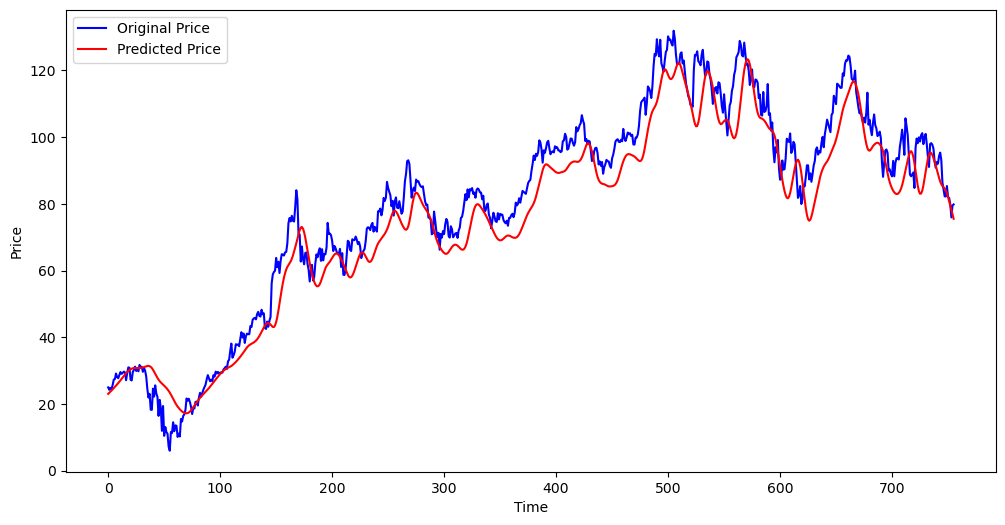

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()